In [ ]:
"""
vou comerçar a tentar as coisas por aqui mesmo usando pedaços do que eu conheço
"""

# Clonar o repositório do Iuri contendo a DASSL (Diferential/Algebraic System Solver)
!git clone https://github.com/iurisegtovich/dasslcy.git


fatal: destination path 'dasslcy' already exists and is not an empty directory.


In [ ]:
%%bash
cd dasslcy
pip install .

Processing /content/dasslcy
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for dasslcy: filename=dasslcy-0.1-cp310-cp310-linux_x86_64.whl size=565799 sha256=3b0300e0edb5eea52b07b54291ebde3b13933aa24cec60a90a3d2d4ab70088ca
  Stored in directory: /tmp/pip-ephem-wheel-cache-q62i9kl0/wheels/79/2f/53/98b2cb35d6ede3587e35e2ede2cb4bdc3f84cf97fdbd9c3bb2
Successfully built dasslcy
  Attempting uninstall: dasslcy
    Found existing installation: dasslcy 0.1
    Uninstalling dasslcy-0.1:
      Successfully uninstalled dasslcy-0.1


In [ ]:
import dasslcy
import numpy as np
import matplotlib.pyplot as plt
import scipy

# plt.style.use('seaborn-v0_8-dark-palette')

# #aqui eu coloco todas as fontEs dos gráficos em Times new roman
# plt.rcParams["font.family"] = "serif"
# plt.rcParams["font.serif"] = "Times New Roman"

Q (m³/s): 1.1666666666666666e-05
velociade: 0.018679768955488348 Q/a=m/s
e/k = 137.70257804413097 
 kT/e = 2.1419352069463384
C_feed (mol/Kg): 5.826111382765115
K_1 (b) =7.599208479780738 
K_2 (d) =0.05401805955326646 
O q_ref deveria ser proximo de 5.501 , ele é qref= 3.9606479881929477
Dm de champan-Enskog é 1.6e-05
k de LDF é 0.005
Dz é 6.457076844425243e-05
Re = 13.30707785259987
1-Pe(52.89900155642636),2-S(0.005995791504000001),3-Dg(653.7731464442755),4-Void(0.34),5-dx(0.0008),6-c_feed(5.826111382765115),7-c_ref(5.826111382765115),8-qmax1(3.257),9-k1(2.09e-07),10-q_ref(3.9606479881929477)
o tempo de ruptura, para y =1, será Tau=585.8587036132812
Q (m³/s): 5.25e-06
velociade: 0.008405896029969755 Q/a=m/s
e/k = 137.70257804413097 
 kT/e = 2.1426614097627295
C_feed (mol/Kg): 19.780856657920268
K_1 (b) =7.55450252807239 
K_2 (d) =0.05377800062872659 
O q_ref deveria ser proximo de 5.501 , ele é qref= 4.905410742925152
Dm de champan-Enskog é 1.6e-05
k de LDF é 0.005
Dz é 3.521684579991

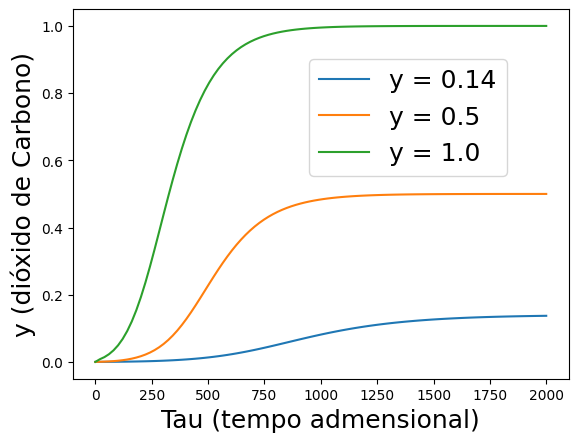

In [ ]:
#dados do sistema / wilkins 1.07 bar e aprox 22.1 C q= 350 CCM qco2 5.501 mol/kg yco2=1

#operação
for z in range(3): # correspondentes a [0.15, 0.5, 1] respectivamente
  Q=np.array([700,315,350])  #ccm (  estou assumindo CUBIC CENTIMITER PER MIM )
  Q_in = Q[z]*(0.000001/60)               # vazão volumétrica (m^3/s) - 30mL/min
  print('Q (m³/s):',Q_in)
  #Q_in = 5.8e-6    #m^3/s
  d_in = 2.82e-2             # diâmetro interno (m)
  A_s  = 3.1415*(d_in/2)**2  # área da seção transversal (m^2)
  vel = Q_in/A_s              # velocidade (m/s)

  print('velociade:',vel,'Q/a=m/s')
  mm_co2=44.009 #g/mol
  mm_n2=28.013 #g/mol

  rho_part= 961.7 # kg/m³

  tortuosidade=3
  e_p=0.35 #porosidade da partícla

  T_celsius= np.array([21.8,21.9,22.1])
  T=T_celsius[z]+273.15 #temperatura em K

  NC = 1                # numero de componentes
  L = 6.4e-2               # comprimento (m)
  void = 0.34                # Porosidade do leito

#-------------------------------------------------------------------------- quebra de célula original
#parâmetros para CE - não usado

  sigma=np.average([3.996,3.667]) #(N2 et Co2  Angstrom)

  e_k_lista= [190,99.8]  # N2 et Co2 e_k

  e_k=scipy.stats.gmean(e_k_lista) #raiz do quadrado das duas

  kt_e=T/e_k

  print(f'e/k = {e_k} \n kT/e = {kt_e}')

#-------------------------------------------------------------------------- quebra de célula original

## Parâmetros da isoterma (Langmuir) DSL dados do artigo
  qmax_1 = 3.257               # mol/kg
  qmax_2= 3.240
  K_1 = 2.09e-07               # m^3/mol -> 1/bar no doc original
  K_2 = 10.6e-7                # não precisa converter pois está em vol por qtd de materia

  R = 8.31                    # J/mol*K               "J = Pa * m^3 = 1e-5 bar * m^3"

#-------------------------------------------------------------------------- quebra de célula original

## Operação
  P = np.array([1.02,0.97,1.07])                    # pressão (bar)
  P_SI = P[z] * 1e5              # pressão (Pa)

#-------------------------------------------------------------------------- quebra de célula original
## Propriedades do gás - CO2 22.1C 1bar
  rho_co2 = [1.8402,1.7489,1.9289]		             # densidade do CO2 (kg/m^3)
  rho_co2 = rho_co2[z]

  mu_co2 =[1.4761e-5,1.4766e-5,1.4776e-05 ]           # viscosidade do CO2 (kg/m*s  == Pa*s)
  mu_co2 = mu_co2[z]

#-------------------------------------------------------------------------- quebra de célula original
#propriedades da partícula
  r_p = 1e-3  # m obs: 13x está entre 0.8mm e 1.2 mm de acordo com o artigo
  d_p= r_p*2
  vel_intersticial= vel/e_p

#-------------------------------------------------------------------------- quebra de célula original


## Referências (vamos usar P e T para calcular a referência) C=P/RT
  y_co2 = np.array([0.14,0.5,1])
  y_co2= y_co2[z]
  C_ref = y_co2*P_SI/(R*T)  #mol/m3
  qsatb = 3.257             #mol/kg
  qsatd = 3.240             #mol/kg
  b0 = 2.09e-7              #m^3/mol
  d0 = 1.06e-7              #m^3/mol
  DHd = - 32.21e3           #J/mol
  DHb = - 42.67e3           #J/mol
  b = b0*np.exp(-DHb/(R*T))
  d = d0*np.exp(-DHd/(R*T))
  q_ref = (qsatb*b*C_ref)/(1+b*C_ref) + (qsatd*d*C_ref)/(1+d*C_ref)  # conc. adsorvida de referência (mol/kg)
  C_feed = C_ref
  print('C_feed (mol/Kg):',C_feed)

  print(f'K_1 (b) ={b} ')
  print(f'K_2 (d) ={d} ')

  print('O q_ref deveria ser proximo de 5.501 , ele é qref=',q_ref)


#-------------------------------------------------------------------------- quebra de célula original


#tem que fazer Dm  do modelo do chapnan enskog CE
  Tcubo=T**3
  omega=1.042
  Soma_massas=((1/mm_co2)+(1/mm_n2))
  denominador_CE= rho_part*sigma*omega

  Dm_CE= 0.0018583*((Tcubo*Soma_massas)**(1/2))*(1/denominador_CE)

  #usando valores direto do wilkings (substituindo com o dado do artigo)
  Dm_CE =1.6e-5


  print(f'Dm de champan-Enskog é {Dm_CE}')

#-------------------------------------------------------------------------- quebra de célula original
#obtenção de Dp com o valor de Dm CE
  Dp =Dm_CE/tortuosidade

#-------------------------------------------------------------------------- quebra de célula original
#obtenção de Km para achar com DP ,cref ,qref

  k_m = 5e-3  # felipe colocou isso pra tentar dar um jeito

  #k_m= (15*e_p*Dp*C_ref)/(q_ref*(r_p**2)) # usando o do texto

  print(f'k de LDF é {k_m}')

  #obtenção de Dz com Dm v instersticial e r_p
  Dz=0.7*Dm_CE + vel_intersticial*r_p

  #########Dz=0.7*Dm_CE+u*r_p relação que eu não to usando
  print(f'Dz é {Dz}')
  #Dz = 1e-7

  #-------------------------------------------------------------------------- quebra de célula original
  ''
  '''
  # Parâmetros do modelo de isoterma

  KL = 5.33 # coeficiente de transferencia de massa
  q_ref = qmax      # concentração adsorvida de referência

  rho=961.7 #kg/m³ (sólido)

  Dz= 1.6*10**(-5)
  v= 0.1218226 #m/s
  L=0.064 #m  tamanho do leito

  NC = 1
  N = 10            # números de segmentos
  Pe = v*L/Dz      # Peclet
  S = KL*L/v          # Adimensional S do B.M. no sólido
  void = 0.35       # fração de vazio (epsilon)
  dx = L/N         # tamanho do segmento da discretização
  C_feed = 281     # concentração de alimentação
  C_ref = C_feed      # concentração de referência
  Dg = rho*C_ref/q_ref        # Adimensional do sólido
  '''
  #tentando melhorar o graf

  #------------------



  ## Adimensionais
  Re = (rho_co2*vel_intersticial*d_p)/mu_co2
  Pe = (vel_intersticial*L)/Dz
  S = (k_m*L)/vel_intersticial
  Dg = rho_part*(q_ref/C_ref)

  ## Discretização
  N = 80            # números de segmentos
  dx = L/N          # tamanho do segmento da discretização (m)

  print(f'Re = {Re}')


  #------------------


  gamma_star = np.ones(N+2)
  par = [Pe, S, Dg, void, dx, C_feed, C_ref,q_ref, qmax_1,qmax_2, K_1, K_2, q_ref, qsatb, qsatd,b0, d0,DHd,DHb,R]

  #isso aqui eu adicionei pra poder vizualizar melhor
  print(f'1-Pe({Pe}),2-S({S}),3-Dg({Dg}),4-Void({void}),5-dx({dx}),6-c_feed({C_feed}),7-c_ref({C_ref}),8-qmax1({qmax_1}),9-k1({K_1}),10-q_ref({q_ref})')


  def mass_balances(t, u, du, par):

      # Alocando os parâmetros
      Pe = par[0]
      S = par[1]
      Dg = par[2]
      void = par[3]
      dx = par[4]
      C_feed = par[5]
      C_ref = par[6]
      q_ref = par[7]
      qmax_1 = par[8]
      qmax_2 =par[9]
      K_1 = par[10]
      K_2 = par[11]
      qsatb = par[12]
      qsatd = par[13]
      b0 = par[14]
      d0 = par[15]
      DHd = par[16]
      DHb = par[17]
      R = par[18]


      resid = np.empty(2*N+4)   #definindo o tamanho do array de residuos

      ####### CONDIÇÃO DE CONTORNO z=0 ##########
      "Condição de Contorno em z=0 na Fase Fluida"
      resid[0] = u[0] - C_feed/C_ref - (1/Pe) *  (u[1] - u[0]) / dx

      "Condição de Contorno em z=0 no Adsorvente"

      gamma_star[0] = (qsatb*(b0*np.exp(-DHb/(R*T)))*u[0])/((1+(b0*np.exp(-DHb/(R*T)))*u[0]))*q_ref + (qsatd*(d0*np.exp(-DHd/(R*T)))*u[0])/((1+(d0*np.exp(-DHd/(R*T)))*u[0]))*q_ref

      resid[N+2] = S * (gamma_star[0] - u[N+2]) - du[N+2]

      ####### CONDIÇÃO DE CONTORNO z=L ##########
      "Condição de Contorno em z=L na Fase Fluida"
      resid[N + 1] = u[N + 1] - u[N]

      "Condição de Contorno em z=L no Adsorvente"
      ids = ((NC+1)*(N+2)-1)
      resid[ids] = u[ids] - u[ids-1]

      ############ BALANÇOS DE MASSA #############

      for i in range(1, N+1):    #percorre de 1 até N

          "Balanço de massa na Fase Fluida"
          resid[i] = du[i] + Dg*((1-void)/void)*du[(NC*(N+2)+i)] + (u[i] - u[i - 1]) / dx \
              - (1/Pe) * (u[i + 1] - 2 * u[i] + u[i - 1]) / dx**2

          "Balanço de massa no Sólido"
          gamma_star[i] = (qsatb*(b0*np.exp(-DHb/(R*T)))*u[i])/(1+(b0*np.exp(-DHb/(R*T)))*u[i])*q_ref + (qsatd*(d0*np.exp(-DHd/(R*T)))*u[i])/(1+(d0*np.exp(-DHd/(R*T)))*u[i])*q_ref
          resid[N+2+i] = S * (gamma_star[i] - u[N+2+i]) - du[N+2+i]


      ires = 0

      return resid, ires


  t0 = np.array([0.0, 2000.0])
  u0 = np.zeros(2*N+4)
  du0 = np.zeros(2*N+4)

  t, y, yp = dasslcy.solve(mass_balances, t0, u0, du0, par)
  tau=np.asarray(t)
  y_sol = np.transpose(y)
  C1_final = y_sol[N+1,:]
  time_min = (tau * L)/(vel/60)

  #tenho que sair de ci/cref para yco2 com intuito de comparar com o artigo
  C_y1= 1*P_SI/(R*T) #C_ref = y_co2*P_SI/(R*T) com y =1
  C1_final= (C1_final*C_ref)/C_y1

  # Plot results
  plt.figure(1)
  #plt.title('Concentration profile')
  plt.plot(tau, C1_final, label = f'y = {y_co2}')

  plt.ylabel('y (dióxido de Carbono)',fontsize=18)
  plt.xlabel('Tau (tempo admensional)',fontsize=18)
  plt.legend(loc='upper right',bbox_to_anchor=[0.9, 0.9],fontsize=18)

  #para o nosso processo tau é


  for i in range(len(tau)):
    if C1_final[i] >= 0.02: #se a concentrção for maior que 0.1 da referencia vou considerar rompido
      #tempo=tau[i]*L/v
      print(f"o tempo de ruptura, para y =1, será Tau={tau[i]}")
      break
    else:
      continue


